## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

# Data Sources

I will be looking at data from the following three sources   
 - Quandl API Key
 - CSV
 - JSON 

# Data from an API Key source:

### Obtain Data

The following three datasets contain the median household listing price for all homes in the states of Utah, Colorado, and Idaho. The data are monthly observations from the past years. This data can be used to show the cost of living difference between the three states. It can also be combined with corporate data to determine if they have higher sales in a state with a higher cost of living or if there is some other relationship.

In [1]:
import quandl
Utahhd= quandl.get('ZILLOW/S44_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Idahohd= quandl.get('ZILLOW/S15_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')
Coloradohd= quandl.get('ZILLOW/S7_MLPAH', authtoken='FD4pvTxsHdGVYBWh1UXZ')

Now that the datasets have been read in, I will evaluate the summary statistics of each to see similarities and differences between them. 

In [2]:
Utahhd.describe()

,Value
count,55.000000
mean,279548.090909
std,33489.947139
min,230000.000000
25%,249900.000000
50%,285000.000000
75%,299900.000000
max,337500.000000


In [3]:
Idahohd.describe()

,Value
count,96.000000
mean,192836.937500
std,43425.088843
min,132550.000000
25%,149900.000000
50%,190000.000000
75%,225652.500000
max,277500.000000


In [4]:
Coloradohd.describe()

,Value
count,96.000000
mean,298270.473958
std,66098.253683
min,199900.000000
25%,238357.375000
50%,289900.000000
75%,361250.000000
max,408597.000000


### Clean Data

Note that the data from each state does not contain the same amount of observations with both Idaho and Colorado beginning before Utah's data. To correct for this, I will merge the dataframes using the pandas merge method and only keep the datapoints that all three states contain. I will then verify that the observation counts are the same across the newly formed dataframe.

In [5]:
import pandas as pd
ui= Utahhd.merge(Idahohd, right_index=True, left_index=True)
uic= ui.merge(Coloradohd, right_index=True, left_index=True)
uic.columns = ['Utah','Idaho','Colorado']
uic.head(6)

,Utah,Idaho,Colorado
Date,,,
2013-06-30,230000.0,190000.0,279000.0
2013-07-31,234900.0,194900.0,282000.0
2013-08-31,234900.0,194500.0,284995.0
2013-09-30,235000.0,194990.0,289900.0
2013-10-31,234900.0,190000.0,285000.0
2013-11-30,234900.0,184990.0,285000.0


In [6]:
#Check that counts are correct across each state
uic.describe(percentiles=[.05,.15,.85,.95])

,Utah,Idaho,Colorado
count,55.000000,55.000000,55.000000
mean,279548.090909,223143.081818,347601.800000
std,33489.947139,31319.323235,40167.903429
min,230000.000000,166787.000000,279000.000000
5%,234900.000000,182500.000000,284998.500000
15%,235000.000000,190250.000000,295400.000000
50%,285000.000000,224900.000000,350000.000000
85%,319500.000000,263809.500000,398100.000000
95%,329620.000000,272900.000000,405450.000000
max,337500.000000,277500.000000,408597.000000


All observation counts are now equal

Next, I will check for missing values

In [7]:
uic.columns[uic.isnull().any()]

Index([], dtype='object')

There are no missing values from June 2013 to November 2017. I will now check to see if there are any outliers. First, I will plot the boxplots for each state and see if any observations lie beyond the end whiskers of the graph.

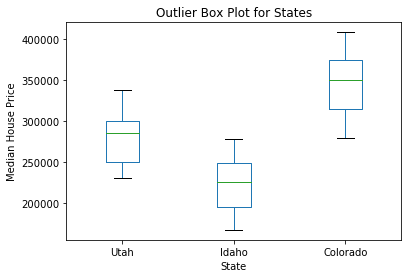

In [8]:
#Look for outliers
import matplotlib.pyplot as plt
%matplotlib inline
uic.plot(kind='box').set_title('Outlier Box Plot for States')
plt.ylabel('Median House Price')
plt.xlabel('State')

There do not appear to be any outliers based on the Box Plot, but I will also examine the states using the IQR to be sure.

In [9]:
#Utah Outliers
std_Utah= uic['Utah'].std()
print('Anything beyond {} is an outlier'.format((std_Utah*3)+ uic['Utah'].mean()))
print('The maximum value is {}'.format(uic['Utah'].max()))
print('Anything less than {} is an oulier'.format(uic['Utah'].mean() - (std_Utah*3)))
print('The minimum value is {}'.format(uic['Utah'].min()))

Anything beyond 380017.93232642487 is an outlier
The maximum value is 337500.0
Anything less than 179078.24949175687 is an oulier
The minimum value is 230000.0


In [10]:
#Idaho Outliers
std_Idaho= uic['Idaho'].std()
print('Anything beyond {} is an outlier'.format((std_Idaho*3)+ uic['Idaho'].mean()))
print('The maximum value is {}'.format(uic['Idaho'].max()))
print('Anything less than {} is an oulier'.format(uic['Idaho'].mean() - (std_Idaho*3)))
print('The minimum value is {}'.format(uic['Idaho'].min()))

Anything beyond 317101.05152262095 is an outlier
The maximum value is 277500.0
Anything less than 129185.1121137427 is an oulier
The minimum value is 166787.0


In [11]:
#Colorado Outliers
std_Colorado= uic['Colorado'].std()
maxoutColorado= (std_Colorado*3)+ uic['Colorado'].mean()
minoutColorado= uic['Colorado'].mean() - (std_Colorado*3)
print('Anything beyond {} is an outlier'.format(maxoutColorado))
print('The maximum value is {}'.format(uic['Colorado'].max()))
print('Anything less than {} is an oulier'.format(minoutColorado))
print('The minimum value is {}'.format(uic['Colorado'].min()))

Anything beyond 468105.51028679294 is an outlier
The maximum value is 408597.0
Anything less than 227098.08971320704 is an oulier
The minimum value is 279000.0


There are no outliers in any of the three states

### Visualize

Now that the data has been found clean, I will plot the distribution of the Median Household Incomes to estimate difference in the cost of living by state.

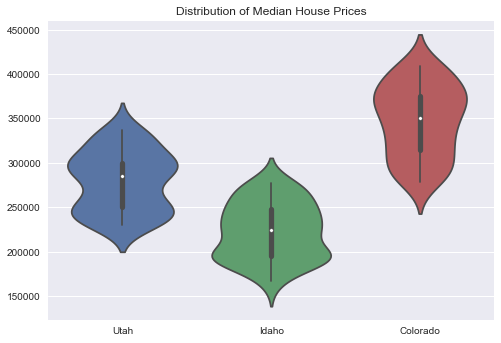

In [12]:
import seaborn as sns
sns.violinplot(data = uic).set_title('Distribution of Median House Prices')
sns.despine(left=True, bottom=True)

From this the tables and this visualization, it is clear that Colorado housing prices are on average greater than those of Idaho or Utah. This would imply a higher cost of living.  

At this point, the data has been clean and examined. Further analysis can be run to see trends or input the data into some equations.

# Data from CSV:

### Obtain Data

The following data comes from a dataset that I collected on all of the school districts in Colorado with information on their students and teachers. I am looking to run a linear regression on this data to determine the relationship between median household income and graduation rates.

In [13]:
School_data= pd.read_csv("/Users/tristanmoser/Files/Tristan/488/CondensedMilk2.csv")

The following details what the variable abbreviations mean:   
 - District: What School District the data comes from
 - Year: Ranging from 2013 to 2015
 - MHI: Median Household Income
 - MHItS: Median Household Income ratio to State Mean
 - GR: High School Graduation Rate
 - MTS: Mean Teacher Salary
 - MTStS: Mean Teacher Salary ratio to State Mean
 - SToTR: Student to Teacher Ratio
 - FemT: Number of Female Teachers
 - TotT: Total number of Teachers
 - FtoTR: Percent of Female Teachers
 - WhiT: Number of White Teachers
 - PctWT: Percent of White Teachers
 - PctMS: Minority Student Percentage of Total Students
 - NumS: Total Number of Students

### Look at and Clean Data

First, I will make sure that there are no missing values.

In [14]:
School_data.isnull().any()

District    False
Year        False
MHI         False
MHItS       False
GR          False
MTS         False
MTStS       False
SToTR       False
FemT        False
TotT        False
FtoTR       False
WhiT        False
PctWT       False
PctMS       False
NumS        False
dtype: bool

There do not appear to be any missing datapoints

To get a better idea of the general spread of the data, I will look at how much lies within the percentiles of 10%, 25%, 75% and 90%.

In [15]:
School_data.describe(percentiles=[.1,.25,.75,.9])

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2014.000000,51103.346442,0.858858,0.822678,40038.071985,0.816966,41.106742,218.814607,288.629213,0.744944,256.011236,0.917210,0.326742,4846.614232
std,0.817262,14271.270922,0.239973,0.162112,6840.826751,0.139297,165.291235,557.783904,736.222808,0.073305,638.164309,0.113089,0.221190,12709.425752
min,2013.000000,22304.000000,0.380000,0.000000,18103.610000,0.370000,2.990000,3.000000,3.000000,0.440000,3.000000,0.140000,0.000000,10.000000
10%,2013.000000,34923.300000,0.583000,0.640000,32938.579000,0.673000,8.181000,12.000000,16.000000,0.650000,15.000000,0.813000,0.110000,121.300000
25%,2013.000000,41161.500000,0.690000,0.770000,35724.297500,0.730000,11.032500,16.000000,22.000000,0.710000,21.000000,0.890000,0.160000,217.250000
50%,2014.000000,48750.000000,0.820000,0.850000,38826.440000,0.790000,14.435000,32.000000,43.000000,0.750000,41.000000,0.950000,0.260000,585.500000
75%,2015.000000,58739.250000,0.990000,0.920000,44377.000000,0.910000,17.537500,115.250000,145.000000,0.787500,140.750000,0.997500,0.460000,2314.500000
90%,2015.000000,69763.100000,1.180000,1.000000,48762.088000,0.990000,21.889000,571.800000,741.600000,0.820000,635.100000,1.000000,0.707000,14266.900000
max,2015.000000,108692.000000,1.850000,1.000000,65999.660000,1.350000,1635.340000,4277.000000,5711.000000,1.000000,4729.000000,1.000000,0.950000,88839.000000


There are graduation rates equal to 0 which suggests that they do not offer high school in those districts. Research on those districts confirms this. I will drop those observations.

In [16]:
School_Data1= School_data = School_data.drop(School_data[School_data.GR == 0].index)
School_Data1.describe()

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2013.998113,51103.166038,0.858868,0.828887,40095.848434,0.818113,41.38100,220.430189,290.766038,0.743528,257.901887,0.916585,0.328038,4883.015094
std,0.816880,14302.166487,0.240461,0.146024,6829.387551,0.139099,165.88465,559.576876,738.587643,0.071013,640.199126,0.113285,0.221236,12750.438008
min,2013.000000,22304.000000,0.380000,0.100000,18103.610000,0.370000,2.99000,5.000000,5.000000,0.440000,3.000000,0.140000,0.000000,37.000000
25%,2013.000000,41161.500000,0.690000,0.780000,35839.232500,0.730000,11.09500,16.250000,22.000000,0.710000,21.000000,0.890000,0.160000,220.250000
50%,2014.000000,48750.000000,0.820000,0.855000,38851.000000,0.790000,14.54000,32.500000,43.500000,0.750000,41.000000,0.950000,0.260000,599.500000
75%,2015.000000,58739.250000,0.990000,0.920000,44461.107500,0.910000,17.58000,116.000000,145.750000,0.780000,141.750000,0.990000,0.460000,2318.750000
max,2015.000000,108692.000000,1.850000,1.000000,65999.660000,1.350000,1635.34000,4277.000000,5711.000000,1.000000,4729.000000,1.000000,0.950000,88839.000000


The data appears to be skewed. The largest values are relatively few compared to the rest, but they severely pull the data upward because the differ so much from the mean. Based on this observation, it appears that there are outliers. To check for this I will plot the data in a boxplot.

## Identify and Control Outliers

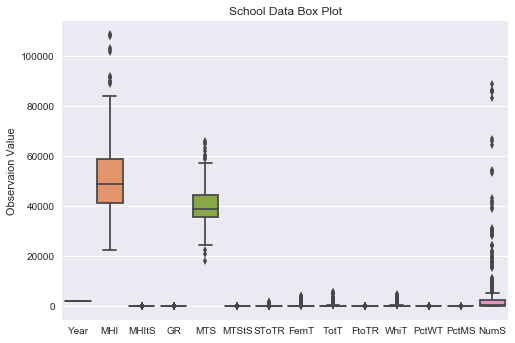

In [17]:
bbbox = sns.boxplot(data =School_Data1).set_title('School Data Box Plot')
plt.ylabel('Observaion Value')

My suspicions of the data being weighted heavily to the right seem to be confirmed. There are many outliers especially in the student enrollment. Because the analysis of this data will likely be linear regression I will need to adjust the data to remove at least the largest outliers. This is because linear regression is very sensitive to outliers.
   
   
In order to see how many outliers should be eliminated, I will calculate the exact values greater than the max whisker of the boxplot.

In [18]:
quantile_data= School_Data1.quantile([.25,.75])
quantile_data.loc['iqr']= quantile_data.loc[.75]-quantile_data.loc[.25]
quantile_data.loc['whisker_length'] = 1.5 * quantile_data.loc['iqr']
quantile_data.loc['max_whisker'] = quantile_data.loc['whisker_length'] + quantile_data.loc[0.75]
quantile_data.loc['max'] = School_Data1.max()
quantile_data.loc['min_whisker'] = quantile_data.loc[0.25] - quantile_data.loc['whisker_length']
quantile_data.loc['min'] = School_Data1.min()
quantile_data

,Year,MHI,MHItS,GR,MTS,MTStS,SToTR,FemT,TotT,FtoTR,WhiT,PctWT,PctMS,NumS
0.25,2013.0,41161.500,0.69,0.78,35839.2325,0.73,11.0950,16.250,22.000,0.710,21.000,0.89,0.16,220.25
0.75,2015.0,58739.250,0.99,0.92,44461.1075,0.91,17.5800,116.000,145.750,0.780,141.750,0.99,0.46,2318.75
iqr,2.0,17577.750,0.30,0.14,8621.8750,0.18,6.4850,99.750,123.750,0.070,120.750,0.10,0.30,2098.50
whisker_length,3.0,26366.625,0.45,0.21,12932.8125,0.27,9.7275,149.625,185.625,0.105,181.125,0.15,0.45,3147.75
max_whisker,2018.0,85105.875,1.44,1.13,57393.9200,1.18,27.3075,265.625,331.375,0.885,322.875,1.14,0.91,5466.50
max,2015.0,108692.000,1.85,1.00,65999.6600,1.35,1635.3400,4277.000,5711.000,1.000,4729.000,1.00,0.95,88839.00
min_whisker,2010.0,14794.875,0.24,0.57,22906.4200,0.46,1.3675,-133.375,-163.625,0.605,-160.125,0.74,-0.29,-2927.50
min,2013.0,22304.000,0.38,0.10,18103.6100,0.37,2.9900,5.000,5.000,0.440,3.000,0.14,0.00,37.00


In [19]:
max_outlier_NumS = [NumS for NumS in School_data['NumS'] if NumS > quantile_data['NumS'].loc['max_whisker']]
len(max_outlier_NumS)

86

In [20]:
max_outlier_NumS[:12]

[24578,
 7584,
 41729,
 30908,
 17103,
 54499,
 28332,
 88839,
 66702,
 6713,
 19552,
 8120]

### Reduce Outliers

In order to lessen the impact of outliers, I will iterate dropping certain observations if they do not match the restraints that I put on the data. It is important to note that I do not want get rid of data that is not necessary to remove. My goal number of observations is to stay above 400 while significanly dropping the number of outliers.   
   
   The following iterations show how this was acheived.

In [21]:
#Drop Districts with more than 4000 students
School_Data2 = School_Data1.drop(School_Data1[School_data.NumS > 4000].index)
#Check observation counts
School_Data2['NumS'].describe()

count     428.000000
mean      750.448598
std       807.220077
min        37.000000
25%       198.000000
50%       409.000000
75%      1039.000000
max      3732.000000
Name: NumS, dtype: float64

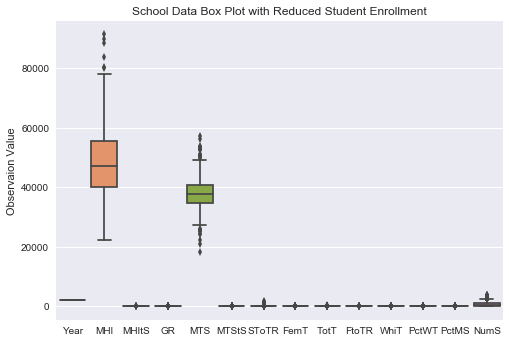

In [22]:
#Visualize outliers with new dataset
sns.boxplot(data=School_Data2).set_title('School Data Box Plot with Reduced Student Enrollment')
plt.ylabel('Observaion Value')

In [23]:
#Drop Districts with Median Household Income greater than 75000
School_Data3 = School_Data2.drop(School_Data2[School_Data2.MHI > 75000].index)
#Check observations count
School_Data3['MHI'].describe()

count      418.000000
mean     47645.478469
std      11050.845441
min      22304.000000
25%      39602.000000
50%      46901.500000
75%      54584.500000
max      74672.000000
Name: MHI, dtype: float64

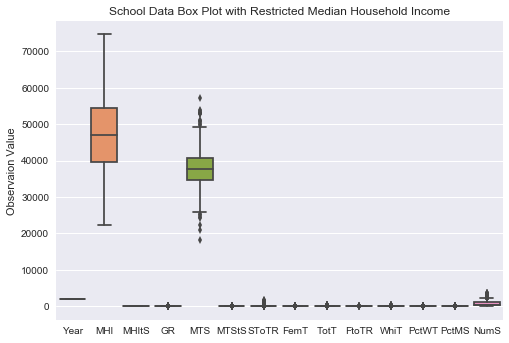

In [24]:
#Visualize outliers with reformed data
sns.boxplot(data= School_Data3).set_title('School Data Box Plot with Restricted Median Household Income')
plt.ylabel('Observaion Value')

In [25]:
#Drop Districts that have Mean Teacher Salary greater than 50000
School_Data4= School_Data3.drop(School_Data3[School_Data3.MTS > 50000].index)
#Check obersvations count
School_Data4['MTS'].describe()

count      406.000000
mean     37649.058867
std       4861.915363
min      18103.610000
25%      34723.122500
50%      37461.410000
75%      40203.637500
max      49782.600000
Name: MTS, dtype: float64

In [26]:
#Drop Districts with Mean Teacher Salary smaller than 25000
School_Data5= School_Data4.drop(School_Data4[School_Data4.MTS < 25000].index)
#Check observations count
School_Data5['MTS'].describe()

count      401.000000
mean     37844.036459
std       4557.343760
min      25171.350000
25%      34846.870000
50%      37558.550000
75%      40230.190000
max      49782.600000
Name: MTS, dtype: float64

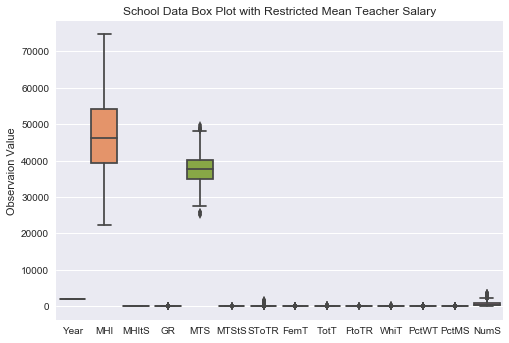

In [27]:
#Visualize Outliers with final observation count
sns.boxplot(data=School_Data5).set_title('School Data Box Plot with Restricted Mean Teacher Salary')
plt.ylabel('Observaion Value')

The outliers have now been controlled enough to minimize their effect. They are not perfectly controlled, but I do not want to risk dropping observations below 400.
   
   
It should be noted that the regression run on this data will now not reflect all of Colorado. However, the datapoints have more observable characteristics in common than they did before droping the problematic outliers. This will allow a better estimate of how the changes in Median Household Income affect the graduation rate.
   ### Visualize
   I will now visualize the distributions of Median Household Income and Graduation Rate to test the normality condition needed for linear regression. I will then show the relationship between Median Household Income and Graduation Rates with a scatterplot.

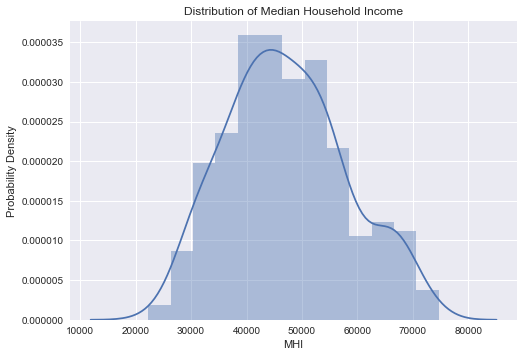

In [28]:
sns.distplot(School_Data5['MHI']).set_title('Distribution of Median Household Income')
plt.ylabel('Probability Density')

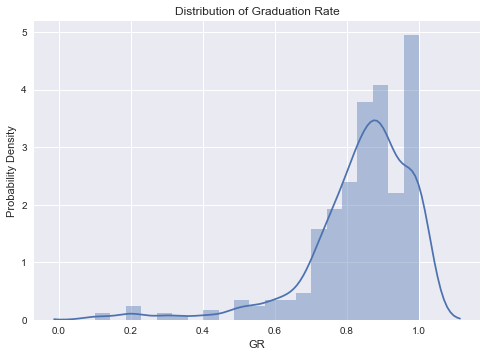

In [29]:
sns.distplot(School_Data5['GR']).set_title('Distribution of Graduation Rate')
plt.ylabel('Probability Density')

The Graduation Rate appears to be skewed to the left which may present problems in the linear regression analysis. Further steps would be necessary to correct for the non-normality.

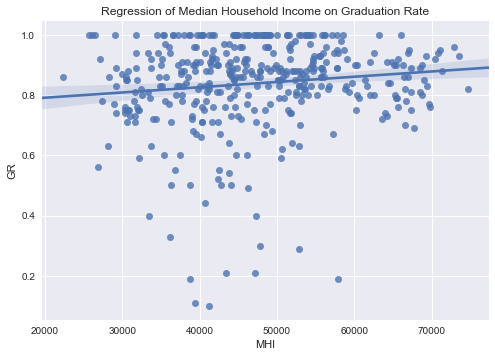

In [30]:
sns.regplot(x='MHI',y='GR',data=School_Data5).set_title('Regression of Median Household Income on Graduation Rate')

This visualization suggests that the relationship between Median Household Income and Graduation Rates is postive. For a more concrete analysis of this relationship more factors would have to be included in the regression. Future analysis could be done to account for this.

# JSON Data via API and Data from an Excel File

I have found two datasets on NFL quarterbacks for this season. The overall data that I want to evaluate is split between the two sets. In order to evaluate all of the data, I will collect each one and then combine them into one dataframe. The first is a JSON dataset taken from the fantasyfootballnerd API containing all Fantasy Football quarterbacks with their jersey numbers and teams as well as some basic information. The secon set is an excel doc taken from FOX Sports for the top 32 quarterbacks this season. This contains only the stats of the quarterbacks.   
I will use this data to evaluate their performances this season.

## Obtain JSON data

In [31]:
import json
import requests
nfl = requests.get("https://www.fantasyfootballnerd.com/service/players/json/zgp6wzse67ai/QB/")

In [32]:
nfl_data= json.loads(nfl.text)

Now that the data has been obtained from the API, I need to make sure that it was collected correctly and also see what its structure is so that I can properly work with it.

In [33]:
nfl_data.keys()

dict_keys(['Players'])

In [34]:
nfl_data

{'Players': [{'active': '1',
   'college': '',
   'displayName': 'Brandon Allen',
   'dob': '0000-00-00',
   'fname': 'Brandon',
   'height': '',
   'jersey': '8',
   'lname': 'Allen',
   'playerId': '3274',
   'position': 'QB',
   'team': 'LAR',
   'weight': ''},
  {'active': '1',
   'college': '',
   'displayName': 'Derek Anderson',
   'dob': '0000-00-00',
   'fname': 'Derek',
   'height': '',
   'jersey': '3',
   'lname': 'Anderson',
   'playerId': '2',
   'position': 'QB',
   'team': 'CAR',
   'weight': ''},
  {'active': '1',
   'college': 'Northern Iowa',
   'displayName': 'Aaron Bailey',
   'dob': '0000-00-00',
   'fname': 'Aaron',
   'height': '6-1',
   'jersey': '15',
   'lname': 'Bailey',
   'playerId': '3510',
   'position': 'QB',
   'team': 'BAL',
   'weight': '233'},
  {'active': '1',
   'college': '',
   'displayName': 'Matt Barkley',
   'dob': '0000-00-00',
   'fname': 'Matt',
   'height': '',
   'jersey': '9',
   'lname': 'Barkley',
   'playerId': '2168',
   'position': 

The primary key, "Players", contains all of the data having one dictionary for each quarterback. This should make it easy to convert into a dataframe using the pandas library.

In [35]:
nfl_df = pd.DataFrame(nfl_data['Players'])
nfl_df.head()

,active,college,displayName,dob,fname,height,jersey,lname,playerId,position,team,weight
0,1,,Brandon Allen,0000-00-00,Brandon,,8,Allen,3274,QB,LAR,
1,1,,Derek Anderson,0000-00-00,Derek,,3,Anderson,2,QB,CAR,
2,1,Northern Iowa,Aaron Bailey,0000-00-00,Aaron,6-1,15,Bailey,3510,QB,BAL,233
3,1,,Matt Barkley,0000-00-00,Matt,,9,Barkley,2168,QB,ARI,
4,1,,C.J. Beathard,0000-00-00,C.J.,,3,Beathard,3321,QB,SF,


At this point it should be noted that there are clearly missing values for many of the quarterbacks. First, I will read in the Excel Doc and merge the dataframes so that I can check for missing values from the collective dataset.

## Read in Excel Doc

In [36]:
NFL_csv1 = pd.read_excel("/Users/tristanmoser/Files/Coding/HW1/NFL2.xlsx")

In [37]:
NFL_csv1.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,13,84.7
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,8,102.8
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,8,103.9
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,7,81.7
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,13,86.4


### Merge Dataframes together

The dataframes are merged on the column "lname" as both datasets contain that variable. The new dataframe will only contain the 32 quarterbacks that are in both datasets. This was the intention so as to only see the most prolific quarterbacks this year.

In [38]:
full_nfl = NFL_csv1.merge(nfl_df, on= 'lname')
full_nfl.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,...,college,displayName,dob,fname,height,jersey,playerId,position,team,weight
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,...,,Blake Bortles,0000-00-00,Blake,,5,2627,QB,JAC,
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,...,,Tom Brady,0000-00-00,Tom,,12,13,QB,NE,
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,...,,Drew Brees,0000-00-00,Drew,,9,14,QB,NO,
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,...,,Jacoby Brissett,0000-00-00,Jacoby,,7,3030,QB,IND,
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,...,,Derek Carr,0000-00-00,Derek,,4,2503,QB,OAK,


## Clean Data

The following columns contain too many missing values and will therefore be dropped:   
 - College
 - Height
 - Weight
 - dob

These other columns do not provide any important information and will also be dropped:   
 - displayName: I already have first and last names
 - active: All players are active
 - position: All players are quarterbacks

In [39]:
full_nfl = full_nfl.drop(['college','height','weight','displayName','dob','active','position'], axis=1)
full_nfl.head()

,lname,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR,fname,jersey,playerId,team
0,Bortles,16,315,523,0.602,32.7,3687,7.1,230.4,21,13,84.7,Blake,5,2627,JAC
1,Brady,16,385,581,0.663,36.3,4577,7.9,286.1,32,8,102.8,Tom,12,13,NE
2,Brees,16,386,536,0.720,33.5,4334,8.1,270.9,23,8,103.9,Drew,9,14,NO
3,Brissett,16,276,469,0.588,29.3,3098,6.6,193.6,13,7,81.7,Jacoby,7,3030,IND
4,Carr,15,323,515,0.627,34.3,3496,6.8,233.1,22,13,86.4,Derek,4,2503,OAK


Now that the dataframes have been merged, I check for missing values and evaluate the data types.

In [40]:
full_nfl.isnull().any()

lname       False
GP          False
COMP        False
ATT         False
PCT         False
ATT/G       False
YDS         False
AVG         False
YDS/G       False
TD          False
INT         False
QBR         False
fname       False
jersey      False
playerId    False
team        False
dtype: bool

In [41]:
full_nfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 16 columns):
lname       32 non-null object
GP          32 non-null int64
COMP        32 non-null int64
ATT         32 non-null int64
PCT         32 non-null float64
ATT/G       32 non-null float64
YDS         32 non-null int64
AVG         32 non-null float64
YDS/G       32 non-null float64
TD          32 non-null int64
INT         32 non-null int64
QBR         32 non-null float64
fname       32 non-null object
jersey      32 non-null object
playerId    32 non-null object
team        32 non-null object
dtypes: float64(5), int64(6), object(5)
memory usage: 4.2+ KB


A brief overview of the datapoints shows that most of the data are similar and there are not expected to be many outliers. Still, a boxplot is shown to be sure.

In [42]:
full_nfl.describe()

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14.531250,300.343750,475.906250,0.629531,32.737500,3409.375000,7.143750,234.221875,20.843750,10.656250,89.078125
std,2.031754,57.276133,80.448886,0.035766,2.765426,734.593579,0.697894,35.119214,7.265071,3.840442,10.814051
min,7.000000,164.000000,267.000000,0.536000,27.500000,1836.000000,5.700000,166.900000,7.000000,4.000000,60.500000
25%,13.750000,266.750000,437.250000,0.606500,30.600000,2926.000000,6.700000,207.225000,17.000000,7.000000,80.775000
50%,15.000000,302.500000,491.000000,0.626000,32.900000,3396.000000,7.300000,232.150000,21.500000,11.000000,90.300000
75%,16.000000,343.250000,537.000000,0.649500,34.300000,4042.000000,7.750000,269.500000,26.250000,13.000000,96.575000
max,16.000000,386.000000,581.000000,0.720000,38.100000,4577.000000,8.100000,286.100000,34.000000,22.000000,104.700000


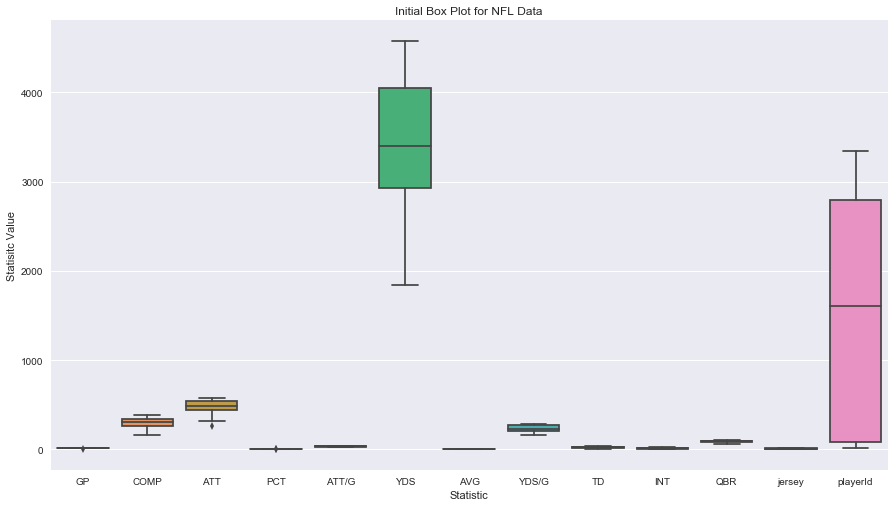

In [43]:
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(data=full_nfl).set_title('Initial Box Plot for NFL Data')
plt.xlabel("Statistic")
plt.ylabel("Statisitc Value")

Due to big variation between the statistics, box plots will be shown for each relevant category to be able to more clearly identify outliers.

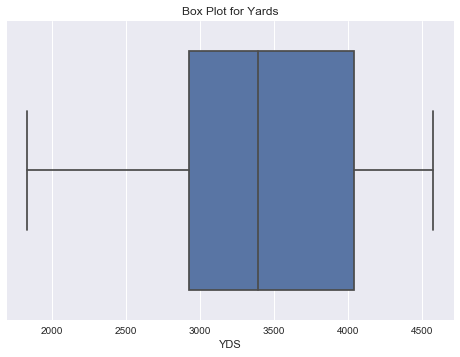

In [44]:
sns.boxplot(full_nfl['YDS']).set_title('Box Plot for Yards')

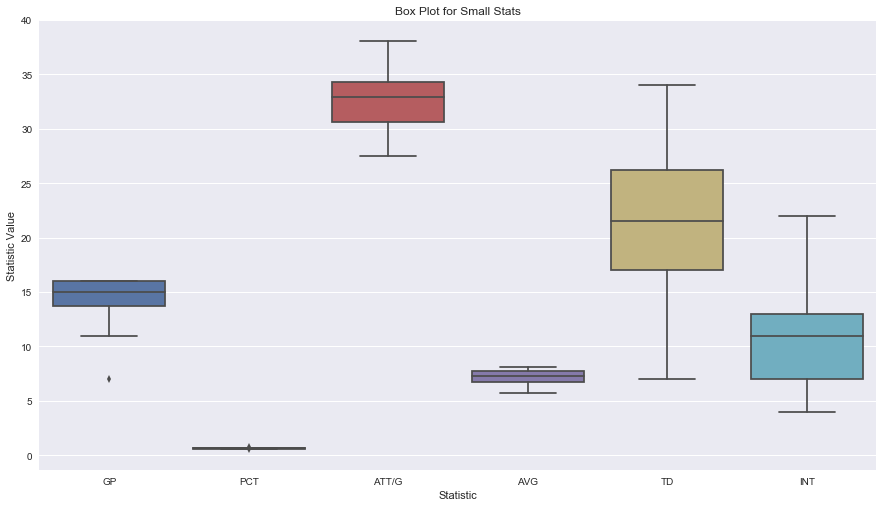

In [45]:
small_stats= full_nfl[['GP','PCT','ATT/G','AVG','TD','INT']]
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(data=small_stats).set_title('Box Plot for Small Stats')
plt.xlabel("Statistic")
plt.ylabel("Statistic Value")

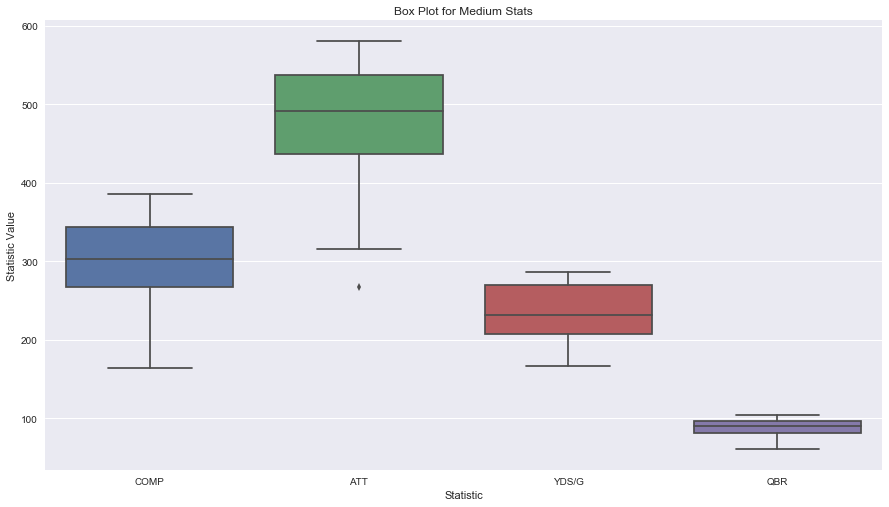

In [46]:
medium_stats= full_nfl[['COMP','ATT','YDS/G','QBR']]
fig, ax = plt.subplots(figsize= (15, 8.27))
sns.boxplot(data=medium_stats).set_title('Box Plot for Medium Stats')
plt.xlabel("Statistic")
plt.ylabel("Statistic Value")

The graphs along with the following chart show that there is at least one outlier in Games Played and Attempts. I will remove that observation as the quarterback cannot fairly be measured against his competitors that played more than double the amount of games.

In [47]:
nfl_quantile_data= full_nfl.quantile([.25,.75])
nfl_quantile_data.loc['iqr']= nfl_quantile_data.loc[.75]-nfl_quantile_data.loc[.25]
nfl_quantile_data.loc['whisker_length'] = 1.5 * nfl_quantile_data.loc['iqr']
nfl_quantile_data.loc['max_whisker'] = nfl_quantile_data.loc['whisker_length'] + nfl_quantile_data.loc[0.75]
nfl_quantile_data.loc['max'] = full_nfl.max()
nfl_quantile_data.loc['min_whisker'] = nfl_quantile_data.loc[0.25] - nfl_quantile_data.loc['whisker_length']
nfl_quantile_data.loc['min'] = full_nfl.min()
nfl_quantile_data

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
0.25,13.750,266.75,437.250,0.6065,30.60,2926.0,6.700,207.2250,17.000,7.0,80.775
0.75,16.000,343.25,537.000,0.6495,34.30,4042.0,7.750,269.5000,26.250,13.0,96.575
iqr,2.250,76.50,99.750,0.0430,3.70,1116.0,1.050,62.2750,9.250,6.0,15.800
whisker_length,3.375,114.75,149.625,0.0645,5.55,1674.0,1.575,93.4125,13.875,9.0,23.700
max_whisker,19.375,458.00,686.625,0.7140,39.85,5716.0,9.325,362.9125,40.125,22.0,120.275
max,16.000,386.00,581.000,0.7200,38.10,4577.0,8.100,286.1000,34.000,22.0,104.700
min_whisker,10.375,152.00,287.625,0.5420,25.05,1252.0,5.125,113.8125,3.125,-2.0,57.075
min,7.000,164.00,267.000,0.5360,27.50,1836.0,5.700,166.9000,7.000,4.0,60.500


In [48]:
full_nfl_1= full_nfl.drop(full_nfl[full_nfl.GP < 8].index)

In [49]:
nfl_quantile_data1= full_nfl_1.quantile([.25,.75])
nfl_quantile_data1.loc['iqr']= nfl_quantile_data1.loc[.75]-nfl_quantile_data1.loc[.25]
nfl_quantile_data1.loc['whisker_length'] = 1.5 * nfl_quantile_data1.loc['iqr']
nfl_quantile_data1.loc['max_whisker'] = nfl_quantile_data1.loc['whisker_length'] + nfl_quantile_data1.loc[0.75]
nfl_quantile_data1.loc['max'] = full_nfl_1.max()
nfl_quantile_data1.loc['min_whisker'] = nfl_quantile_data1.loc[0.25] - nfl_quantile_data1.loc['whisker_length']
nfl_quantile_data1.loc['min'] = full_nfl_1.min()
nfl_quantile_data1

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
0.25,14.50,267.00,441.0,0.6050,30.600,3012.0,6.70,206.950,18.00,7.50,80.75
0.75,16.00,344.50,538.0,0.6520,34.150,4042.0,7.80,262.700,26.50,13.00,97.15
iqr,1.50,77.50,97.0,0.0470,3.550,1030.0,1.10,55.750,8.50,5.50,16.40
whisker_length,2.25,116.25,145.5,0.0705,5.325,1545.0,1.65,83.625,12.75,8.25,24.60
max_whisker,18.25,460.75,683.5,0.7225,39.475,5587.0,9.45,346.325,39.25,21.25,121.75
max,16.00,386.00,581.0,0.7200,38.100,4577.0,8.10,286.100,34.00,22.00,104.70
min_whisker,12.25,150.75,295.5,0.5345,25.275,1467.0,5.05,123.325,5.25,-0.75,56.15
min,11.00,192.00,316.0,0.5360,27.500,1836.0,5.70,166.900,7.00,4.00,60.50


After dropping the lowest observation with Games Played = 7, there is one more outlier of 11 but that it relatively close to the minimum whisker of 12.25. Therefore the observation will be kept. It looks as though the data is now clean and ready to start being analyzed.

## Visualize

I am curious to see the distribution of jersey numbers and see which is the most common in the NFL today.

In [50]:
jersey = full_nfl['jersey']
jersey1 = pd.to_numeric(jersey)
jersey2 = pd.DataFrame(jersey1)

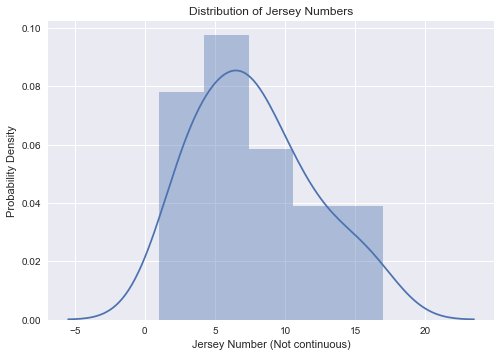

In [51]:
sns.distplot(jersey1).set_title('Distribution of Jersey Numbers')
plt.xlabel("Jersey Number (Not continuous)")
plt.ylabel("Probability Density")

It appears that around the number 7 is the most common.

For further visualization, I show the correlation between the statistics and graph the relationships between the Key Indicators that are most commonly evaluated in the NFL: touchdowns, interceptions, pass completions, pass attempts, yards, and the quarterback rating.

In [52]:
full_nfl.corr()

,GP,COMP,ATT,PCT,ATT/G,YDS,AVG,YDS/G,TD,INT,QBR
GP,1.000000,0.818893,0.882095,0.170447,0.029639,0.739143,0.126404,0.085276,0.556521,0.160586,0.277885
COMP,0.818893,1.000000,0.956401,0.539266,0.506598,0.931435,0.429098,0.545855,0.743104,-0.018217,0.588164
ATT,0.882095,0.956401,1.000000,0.272289,0.488465,0.892445,0.276952,0.435004,0.722993,0.160995,0.409759
PCT,0.170447,0.539266,0.272289,1.000000,0.245049,0.494757,0.614837,0.532999,0.375865,-0.517638,0.768097
ATT/G,0.029639,0.506598,0.488465,0.245049,1.000000,0.527551,0.374190,0.788886,0.497394,0.029500,0.364737
YDS,0.739143,0.931435,0.892445,0.494757,0.527551,1.000000,0.674760,0.724263,0.823968,-0.104154,0.704162
AVG,0.126404,0.429098,0.276952,0.614837,0.374190,0.674760,1.000000,0.862890,0.582263,-0.499703,0.853486
YDS/G,0.085276,0.545855,0.435004,0.532999,0.788886,0.724263,0.862890,1.000000,0.648694,-0.312303,0.754997
TD,0.556521,0.743104,0.722993,0.375865,0.497394,0.823968,0.582263,0.648694,1.000000,-0.174255,0.760001
INT,0.160586,-0.018217,0.160995,-0.517638,0.029500,-0.104154,-0.499703,-0.312303,-0.174255,1.000000,-0.675319


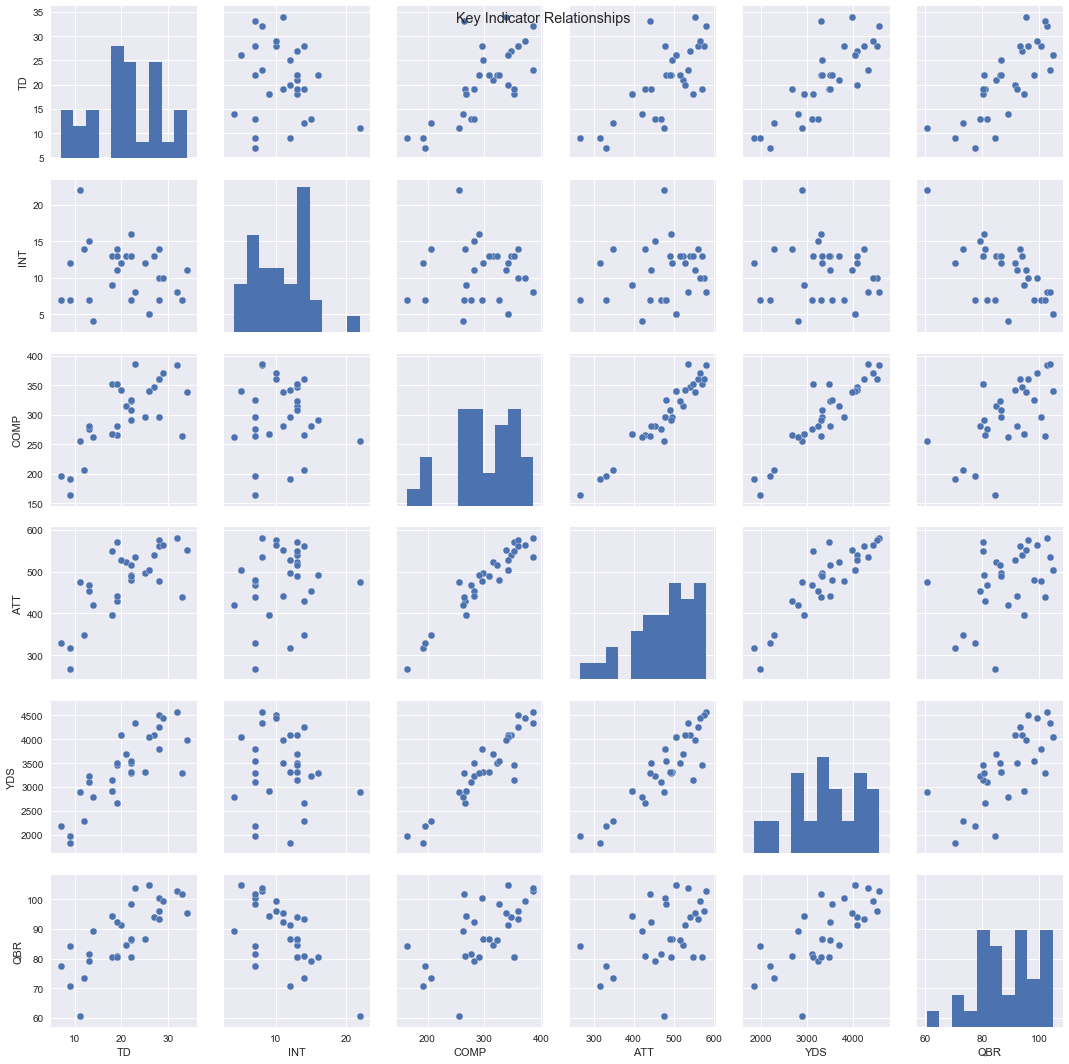

In [53]:
sns.pairplot(full_nfl[['TD','INT','COMP','ATT','YDS','QBR']])
plt.suptitle("Key Indicator Relationships")

The trends here are obvious. If you throw the ball well, you will score points and not turn the ball over with much frequency.   
   
   